# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [3]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

train_files = np.array(glob("/data/dog_images/train/*/*"))
valid_files = np.array(glob("/data/dog_images/valid/*/*"))
test_files = np.array(glob("/data/dog_images/test/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d train dog images.' % len(train_files))
print('There are %d valid dog images.' % len(valid_files))
print('There are %d test dog images.' % len(test_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 6680 train dog images.
There are 835 valid dog images.
There are 836 test dog images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


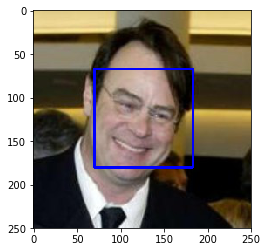

In [5]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Sample images show below:

Affenpinscher


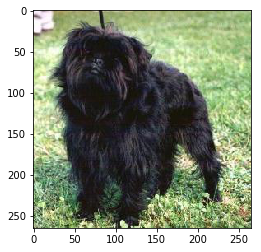

Yorkshire Terrier


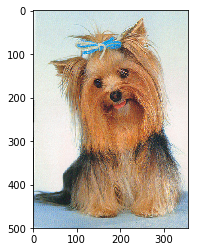

Smallest file of 8KB - Image of American Foxhound


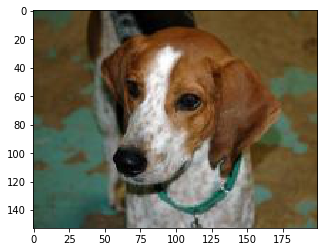

Largest file of 7.1 MB - Alaskan Malamute


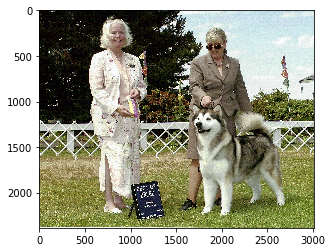

In [20]:
from PIL import Image
img_dog = Image.open("/data/dog_images/train/001.Affenpinscher/Affenpinscher_00010.jpg")
print("Affenpinscher")
plt.imshow(img_dog)
plt.show()

img_dog = Image.open("/data/dog_images/train/133.Yorkshire_terrier/Yorkshire_terrier_08335.jpg")
print("Yorkshire Terrier")
plt.imshow(img_dog)
plt.show()

img_dog = Image.open("/data/dog_images/test/007.American_foxhound/American_foxhound_00522.jpg")
print("Smallest file of 8KB - Image of American Foxhound")
plt.imshow(img_dog)
plt.show()


img_dog = Image.open("/data/dog_images/train/005.Alaskan_malamute/Alaskan_malamute_00366.jpg")
print("Largest file of 7.1 MB - Alaskan Malamute")
plt.imshow(img_dog)
plt.show()


Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
Percentage humans detected as humans =  98 %
Percentage of dogs detected as humans =  17 %

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_count=0
for humans_path in human_files_short:
    if face_detector(humans_path)==True:
        human_count+= 1

print("Percentage humans detected as humans = ", human_count, '%')         

dog_count=0
for dogs_path in dog_files_short:
    if face_detector(dogs_path)==True:
        dog_count+= 1

print("Percentage of dogs detected as humans = ", dog_count, '%')         



Percentage humans detected as humans =  98 %
Percentage of dogs detected as humans =  17 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:17<00:00, 30814032.93it/s]


###### Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [21]:
from PIL import Image
import torchvision.transforms as transforms
from torch.autograd import Variable

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image

    img = Image.open(img_path) # Load an image from the file system.
    
    #All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel 
    #RGB images of shape (3 x H x W), where H and W are expected to be at least 224. 
    #The images have to be loaded in to a range of [0, 1] and then 
    #normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]. 
    
    transform_pipeline = transforms.Compose([transforms.Resize((224,224)),
                                         transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                              std=[0.229, 0.224, 0.225])]) 
    img = transform_pipeline(img)

    # PyTorch pretrained models expect the Tensor dims to be (num input imgs, num color channels, height, width).
    # Currently however, we have (num color channels, height, width); let's fix this by inserting a new axis.
    img = img.unsqueeze(0)  # Insert the new axis at index 0 i.e. in front of the other axes/dims. 

    #PyTorch models expect inputs to be Variables. so convert the image to a variable  
    print(img)
    img = Variable(img)
    if use_cuda:
        img = img.cuda()
    
    # Now let's load our model and get a prediciton!
    prediction = VGG16(img)  # Returns a Tensor of shape (batch, num class labels)
    
    if use_cuda:
        prediction = prediction.cpu()
        
    prediction = prediction.data.numpy().argmax()  # Our prediction will be the index of the class label with the largest value.    
    
    return prediction # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [7]:

### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    predict_index = VGG16_predict(img_path)
    if (predict_index>150 and predict_index<269):
        return True

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
Percentage humans detected as dogs =  0 %
Percentage of dogs detected as dogs =  100 %

In [8]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_count=0
for humans_path in human_files_short:
    if dog_detector(humans_path)==True:
        human_count+= 1

print("Percentage humans detected as dogs = ", human_count, '%')         

dog_count=0
for dogs_path in dog_files_short:
    if dog_detector(dogs_path)==True:
        dog_count+= 1

print("Percentage of dogs detected as dogs = ", dog_count, '%')         


Percentage humans detected as dogs =  0 %
Percentage of dogs detected as dogs =  100 %


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [8]:
import os
from torchvision import datasets
import torch


### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

data_dir = '/data/dog_images'
train_dir = data_dir + '/train'
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

train_transforms_scratch = transforms.Compose([transforms.RandomResizedCrop(256),
                                       transforms.RandomRotation(45),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])


train_data = datasets.ImageFolder(train_dir, transform=train_transforms_scratch)

print(train_data)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True,num_workers=0)
print(trainloader)

valid_dir = data_dir + '/valid'

print(valid_dir)

valid_test_trans = transforms.Compose([transforms.Resize(300),
                                    transforms.CenterCrop(256),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406], 
                                                        [0.229, 0.224, 0.225])])

valid_data = datasets.ImageFolder(valid_dir, transform=valid_test_trans)

print(valid_data)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=16, shuffle=False,num_workers=0)

print(validloader)

test_dir = data_dir + '/test'


test_data = datasets.ImageFolder(test_dir, transform=valid_test_trans)
print(test_data)
testloader = torch.utils.data.DataLoader(test_data, batch_size=16, shuffle=False,num_workers=0)

print(testloader)

loaders_scratch = {'train': trainloader,
                  'valid': validloader,
                  'test': testloader}



Dataset ImageFolder
    Number of datapoints: 6680
    Root Location: /data/dog_images/train
    Transforms (if any): Compose(
                             RandomResizedCrop(size=(256, 256), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
                             RandomRotation(degrees=(-45, 45), resample=False, expand=False)
                             RandomHorizontalFlip(p=0.5)
                             ToTensor()
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                         )
    Target Transforms (if any): None
/data/dog_images/valid
Dataset ImageFolder
    Number of datapoints: 835
    Root Location: /data/dog_images/valid
    Transforms (if any): Compose(
                             Resize(size=300, interpolation=PIL.Image.BILINEAR)
                             CenterCrop(size=(256, 256))
                             ToTensor()
                             Normalize(mean=[0.485, 0.456, 0

tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

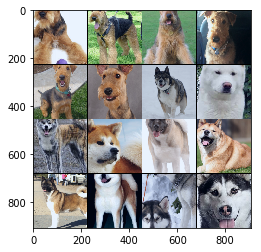

In [13]:
#verify the data by plotting it

import torchvision
train_iter = iter(trainloader)
images, labels = train_iter.next()
print(images[0])

train_iter = iter(validloader)
images, labels = train_iter.next()
print(images.shape)

train_iter = iter(testloader)
images, labels = train_iter.next()
print(images[0])


def plot_images(images, labels): 
    # normalise=True below shifts [-1,1] to [0,1]
    img_grid = torchvision.utils.make_grid(images, nrow=4, normalize=True)
    np_img = img_grid.numpy().transpose(1,2,0)  
    plt.imshow(np_img)
    
d_class2idx = train_data.class_to_idx
d_idx2class = dict(zip(d_class2idx.values(),d_class2idx.keys()))

images, labels = train_iter.next()
plot_images(images,labels)
#print(' '.join('%5s' % d_idx2class[int(labels[j])]for j in range(len(images))))

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?

  
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?



**Answer**:

Resized the image to a size of 256x256. As this was a CNN from scratch, tried to use a larger image of 256x256 as larger image is better for training. Smaller images though fast did not have sufficient details.

For the training, the images were randomly resized and cropped to image size of 256x256. The images were also randomly rotated by 45 degrees, shuffled and randomly fliped. This will help the training better as a dog image could be anywhere in a regular picture. 

The validation and test data were resized to 300x300 and center cropped to a size of 256x256.  Did not do any other transformation to the validation and test images as real world images are not transformed. 

The batch size of 16 was used and the number of workers was set to 0. Attempts were made to use larger batch size but soon ran into memory issues.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [11]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer (sees 256x256x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        
        # convolutional layer (sees 128x128x3 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        
        # convolutional layer (sees 64x64x3 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        self.lastCNNsize = 32**2 * 64
        # linear layer, flatten output of CNN
        self.fc1 = nn.Linear(self.lastCNNsize, 500)  # flatten to 500x1
        
        # linear layer (500 -> 133) transform 500x1 to 133x1 different dog breeds
        self.fc2 = nn.Linear(500, 133)  
        
        # dropout layer (p=0.25), same as in CIFAR example
        self.dropout = nn.Dropout(0.25)
    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = F.relu(self.conv1(x))   # gets a 256 image
        x = self.pool(x)            # maxpool down to 128
        x = F.relu(self.conv2(x))   # gets a 128 image
        x = self.pool(x)            # maxpool down to 64
        x = F.relu(self.conv3(x))   # gets a 64 image
        x = self.pool(x)            # maxpool down to 32
        
        # flatten image input
        x = x.view(-1, self.lastCNNsize) 
        
        # add dropout layer
        x = self.dropout(x)
        
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        
        # add dropout layer
        x = self.dropout(x)
        x = self.fc2(x) # transform to labels 133x1
        
        return x
#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

A model with 3 convolution layers were used. Additional layers could have been used but it would take very long time for the training to be done. 

As the input image was color with a size of 256x256, the image tensor is 256x256x3. The first convolution parameter was chosen to be be 3, 16, 3 which would match the input tensor. The second convolution was reduced to a size of 128x128x3 so the input parameters were 16,32,3. The final convolution image was further reduced to 64x64x3 with input parameters of 32, 64, 3. The padding used was 1 for all the three convolution layers. 

For the output the output was flattened to 500 classes and then reduced to 133 classes as there are only 133 dog breeds in teh image files. A maxpool of (2,2) and dropout of 0.25 were used.

For optimizing, Adam optimizer was used with a learning rate of 0.001. The criterion used was CrossEntropyLoss. The training was done over 15 epochs. Lower number of epochs led to larger test error and poorer accuracy. Increasing the epoch would have led to a higher accuracy.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [12]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = torch.optim.Adam(model_scratch.parameters(), lr=.001)
#scheduler = optim.lr_scheduler.StepLR(optimizer_scratch, step_size=10, gamma=0.1)


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [8]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
             ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            optimizer.zero_grad()
            outputs = model(data)  # forward pass 
            loss = criterion(outputs,target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
                        ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
    
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    # return trained model
    return model




In [14]:
# train the model
model_scratch = train(25, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.892941 	Validation Loss: 4.866405
Validation loss decreased (inf --> 4.866405).  Saving model ...
Epoch: 2 	Training Loss: 4.765772 	Validation Loss: 4.675705
Validation loss decreased (4.866405 --> 4.675705).  Saving model ...
Epoch: 3 	Training Loss: 4.697785 	Validation Loss: 4.674508
Validation loss decreased (4.675705 --> 4.674508).  Saving model ...
Epoch: 4 	Training Loss: 4.656078 	Validation Loss: 4.551045
Validation loss decreased (4.674508 --> 4.551045).  Saving model ...
Epoch: 5 	Training Loss: 4.545410 	Validation Loss: 4.368221
Validation loss decreased (4.551045 --> 4.368221).  Saving model ...
Epoch: 6 	Training Loss: 4.488631 	Validation Loss: 4.352140
Validation loss decreased (4.368221 --> 4.352140).  Saving model ...
Epoch: 7 	Training Loss: 4.405784 	Validation Loss: 4.311395
Validation loss decreased (4.352140 --> 4.311395).  Saving model ...
Epoch: 8 	Training Loss: 4.346825 	Validation Loss: 4.191093
Validation loss decreased (4.31139

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [9]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))



In [16]:
# call test function  

test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.949607


Test Accuracy: 10% (89/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [9]:
## TODO: Specify data loaders
import os
from torchvision import datasets
from PIL import Image
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch
import torchvision.models as models


### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
batch_size = 16
num_workers = 0
pin_memory = False
data_dir = '/data/dog_images'
train_dir = data_dir + '/train'
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

train_transforms = transforms.Compose([transforms.RandomResizedCrop(224),
                                        transforms.ColorJitter(),
                                        transforms.RandomRotation(45),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])


train_data = datasets.ImageFolder(train_dir, transform=train_transforms)



trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True,pin_memory = pin_memory,num_workers=num_workers)

valid_dir = data_dir + '/valid'


valid_test_transforms = transforms.Compose([transforms.Resize(300),
                                       transforms.CenterCrop(224),     
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])
valid_data = datasets.ImageFolder(valid_dir, transform=valid_test_transforms)


validloader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=False,pin_memory = pin_memory, num_workers=num_workers)



test_dir = data_dir + '/test'

test_data = datasets.ImageFolder(test_dir, transform=valid_test_transforms)

testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False,pin_memory = pin_memory,num_workers=num_workers)



loaders_transfer = {'train': trainloader,
                  'valid': validloader,
                  'test': testloader}


tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

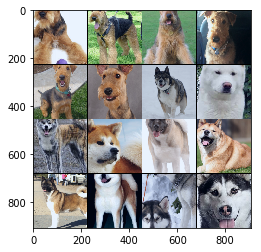

In [14]:
#verify the data by plotting it

import torchvision
train_iter = iter(trainloader)
images, labels = train_iter.next()
print(images[0])
print(images.shape, labels.shape)


train_iter = iter(validloader)
images, labels = train_iter.next()
print(images[0])

print(images.shape, labels.shape)


train_iter = iter(testloader)
images, labels = train_iter.next()
print(images[0])


print(images.shape, labels.shape)

def plot_images(images, labels): 
    # normalise=True below shifts [-1,1] to [0,1]
    img_grid = torchvision.utils.make_grid(images, nrow=4, normalize=True)
    np_img = img_grid.numpy().transpose(1,2,0)  
    plt.imshow(np_img)
    
d_class2idx = train_data.class_to_idx
d_idx2class = dict(zip(d_class2idx.values(),d_class2idx.keys()))

images, labels = train_iter.next()
plot_images(images,labels)
#print(' '.join('%5s' % d_idx2class[int(labels[j])]for j in range(len(images))))

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [10]:
import torchvision.models as models
import torch.nn as nn
import torch
from collections import OrderedDict

## TODO: Specify model architecture 

# define VGG16 model
model_transfer = models.vgg16(pretrained = True)


# Freeze model weights
for param in model_transfer.features.parameters():
    param.require_grad = False


model_transfer.classifier = nn.Sequential(OrderedDict([('fc1',nn.Linear(25088,4096)), 
                                        ('relu',nn.ReLU()),
                                        ('Dropout',nn.Dropout(0.4)),
                                        ('fc2',nn.Linear(4096,133)),
                                        ('output',nn.LogSoftmax(dim=1))]))

model_transfer.classifier.trainable = True

#n_inputs = model_transfer.classifier[6].in_features
    
#model_transfer.classifier[6] = nn.Sequential(
#                      nn.Linear(n_inputs, 256), 
#                      nn.ReLU(), 
#                      nn.Dropout(0.4),
#                      nn.Linear(256, 133),                   
#                      nn.LogSoftmax(dim=1))



# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    model_transfer = model_transfer.cuda()

print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

For the transfer learning, a pretrained model of VGG16 was used. VGG16 was pre trained using Imagenet images of dogs.  This model had previously given good results for detecting dogs. Alternate models like inceptionv3, resnet50 etc could have been used.  Imagenet uses an image size of 224x224. A new data loader had to be created as the previous data loader from scratch had a different image size of 256 images. The training images were subject to shuffle, color jitters and random (resize, crop, rotation and flip).

The layers in VGG16 pretrained model were frozen and the outer layer was adjusted for the training. An output of 25088 was reduced to 133 classes in two steps. Dropout of 0.4 was used for training. Softmax of 1 was used in the model. Initial attempts of using Adam optimizer did not give good results. The SGD optimizer worked very well and was used for this training. A scheduler was used varying the learning rate. Again, the optimization was used only to change the outer layer/classifier of the model. All other layers of the VGG16 model were frozen. 

After running the training for 10 epochs, a model accuracy of over 74% was obtained. The model could be run for additional epochs for higher accuracy.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [20]:
import torch.optim as optim

criterion_transfer = nn.NLLLoss()

#optimizer_transfer = torch.optim.Adam(model_transfer.classifier.parameters(), lr=.001)
#scheduler = optim.lr_scheduler.StepLR(optimizer_transfer, step_size=3, gamma=0.1)

optimizer_transfer = optim.SGD(model_transfer.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer_transfer, step_size=7, gamma=0.1)


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [21]:
# train the model
model_transfer = train(10, loaders_transfer, model_transfer, optimizer_transfer, 
                      criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))


Epoch: 1 	Training Loss: 3.301586 	Validation Loss: 1.696120
Validation loss decreased (inf --> 1.696120).  Saving model ...
Epoch: 2 	Training Loss: 2.174309 	Validation Loss: 1.393714
Validation loss decreased (1.696120 --> 1.393714).  Saving model ...
Epoch: 3 	Training Loss: 1.841605 	Validation Loss: 1.038442
Validation loss decreased (1.393714 --> 1.038442).  Saving model ...
Epoch: 4 	Training Loss: 1.663350 	Validation Loss: 1.197454
Epoch: 5 	Training Loss: 1.553174 	Validation Loss: 0.943933
Validation loss decreased (1.038442 --> 0.943933).  Saving model ...
Epoch: 6 	Training Loss: 1.485395 	Validation Loss: 1.024961
Epoch: 7 	Training Loss: 1.399981 	Validation Loss: 0.970307
Epoch: 8 	Training Loss: 1.382815 	Validation Loss: 0.802673
Validation loss decreased (0.943933 --> 0.802673).  Saving model ...
Epoch: 9 	Training Loss: 1.260399 	Validation Loss: 0.812586
Epoch: 10 	Training Loss: 1.195652 	Validation Loss: 0.948525


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [22]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.871037


Test Accuracy: 74% (625/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [11]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
inputs, classes = next(iter(loaders_transfer['train']))

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes] #was data_transfer

def predict_breed_transfer(img_path):
    model_transfer.load_state_dict(torch.load('model_transfer.pt'))
    img = Image.open(img_path) # Load an image from the file system.
    
    transform_pipeline = transforms.Compose([transforms.Resize((224,224)),
                                         transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                              std=[0.229, 0.224, 0.225])]) 
    img = transform_pipeline(img)

    # PyTorch pretrained models expect the Tensor dims to be (num input imgs, num color channels, height, width).
    # Currently however, we have (num color channels, height, width); let's fix this by inserting a new axis.
    img = img.unsqueeze(0)  # Insert the new axis at index 0 i.e. in front of the other axes/dims. 

    #PyTorch models expect inputs to be Variables. so convert the image to a variable  

    img = Variable(img)    
    
    
    if use_cuda:
        img = img.cuda()
    
    

    # load the image and return the predicted breed
    
    prediction = model_transfer(img)
  
    return class_names[torch.max(prediction,1)[1].item()]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

hello, human


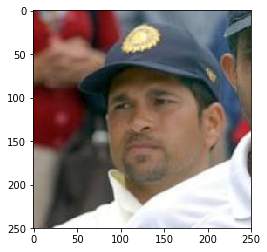

 You look like ....
American foxhound 



In [12]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
    
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
        

    

    if dog_detector(img_path):
        breed = predict_breed_transfer(img_path)
        print("hello doggy")
        image = Image.open(img_path)
        plt.imshow(image)
        plt.show()
        print("It might be:", breed, "\n")
    elif face_detector(img_path):
        breed = predict_breed_transfer(img_path)
        print("hello, human")
        image = Image.open(img_path)
        plt.imshow(image)
        plt.show()
        print(" You look like ....")
        print(breed,"\n")
        
    else:
        print("Neither human or dog")
        image = Image.open(img_path)
        plt.imshow(image)
        plt.show()
        print("\n")
 
    
run_app("/data/lfw/Sachin_Tendulkar/Sachin_Tendulkar_0001.jpg")   


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The algorithm uses the dog detector and human face detector from the beginning of the notebook. In the initial test, the human detector was having lower accuracy than dog detector. So in this alogrithm, the dog detector is used to verify if the image was a dog. If the image was not a dog, then human detector was used to determine if the image was human. Finally, if neither of the detectors worked, the image was flagged as neither of the two categories.

It was interesting to see that the model for finding the breed was using human images to find what breed was used. Celebriteis and common dogs images were used to test out the alogrithm.

1) Use more epochs to get a model that is neither under fitted nor over fitted.
2) Use alternate models other than VGG16 for example Resnet50, VGG19 etc.. 
3) Better human detector algorithm would be better.



hello doggy


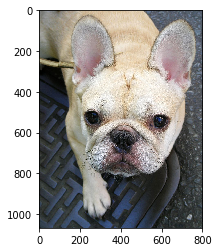

It might be: French bulldog 

hello doggy


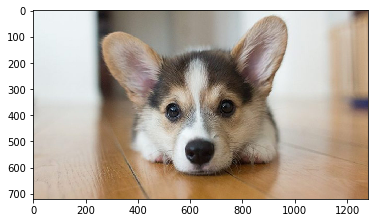

It might be: Pembroke welsh corgi 

hello, human


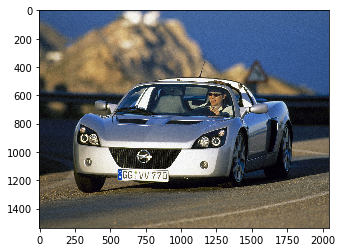

 You look like ....
American staffordshire terrier 

hello, human


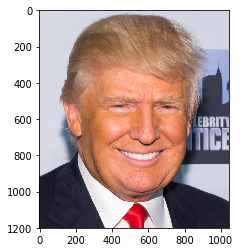

 You look like ....
Dogue de bordeaux 

hello, human


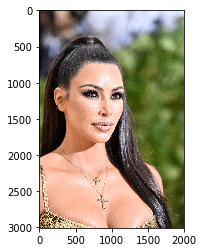

 You look like ....
Chinese crested 

Neither human or dog


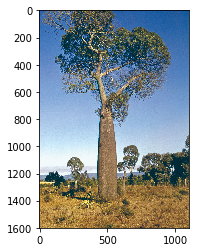

In [13]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
sample_files = np.array(glob("/home/workspace/dog_project/samples/*"))

for file in np.hstack(sample_files):
    run_app(file)

## suggested code, below
#for file in np.hstack((human_files[:3], dog_files[:3])):
#    run_app(file)